Extra Lab Work based On FashionMnist

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
#Load fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#To Correctly input the data into the model
print(x_train.shape) 
print(y_train.shape)  
print(x_test.shape)   
print(y_test.shape)   

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [6]:
#Convert class vectors to binary class matrices (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#Define ALexNet model in Keras
from tensorflow.keras.layers import Dropout
input_shape =(28,28,1)
num_classes = 10
model = models.Sequential()

# Layer 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

c:\Users\user\Desktop\MCA AI DS 2027\S2\Deep Learning\Lab\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#--model architecture
tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True,show_dtype=False)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#Create data Augmentation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range = 0.1 , #randomly shift images Horizontally
    height_shift_range = 0.1, #Randomly Shift images Vertically
    horizontal_flip = True #randomly flip images Horizontally
)

In [14]:
datagen.fit(x_train)

In [23]:
#Train Model 
history = model.fit(datagen.flow(x_train,y_train,batch_size=64),
                            epochs = 10,
                            validation_data = (x_test,y_test),
                            verbose = 1)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.7549 - loss: 0.6193 - val_accuracy: 0.7904 - val_loss: 0.5296
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.7743 - loss: 0.5711 - val_accuracy: 0.7947 - val_loss: 0.5130
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.7824 - loss: 0.5539 - val_accuracy: 0.8033 - val_loss: 0.4958
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.7867 - loss: 0.5427 - val_accuracy: 0.8103 - val_loss: 0.4823
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.7918 - loss: 0.5320 - val_accuracy: 0.8133 - val_loss: 0.4781
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.7965 - loss: 0.5247 - val_accuracy: 0.8122 - val_loss: 0.4852
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.7992 - loss: 0.5138 - val_accuracy: 0.8214 - val_loss: 0.4705
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8014 - loss: 0.5080 - 

In [24]:
#Evaluate The Model
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy:{test_acc}')

313/313 - 3s - 8ms/step - accuracy: 0.8218 - loss: 0.4569
Test Accuracy:0.8217999935150146


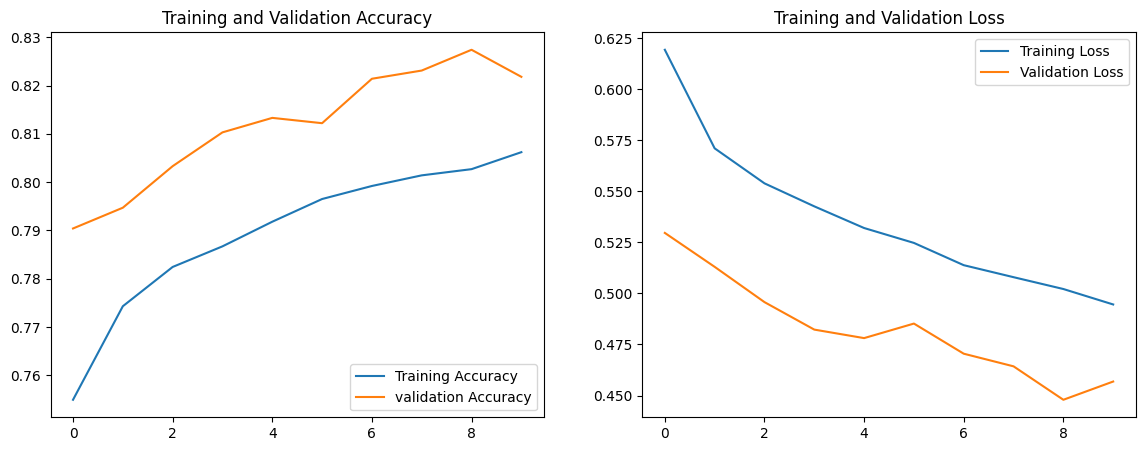

In [25]:
#plot Training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./Classwork1.png')
plt.show()
